# Explore here

In [ ]:
# Your code here

## Importación de librerías

In [1]:
import pickle
import json
import os
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import (train_test_split, GridSearchCV)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import ( MinMaxScaler, LabelEncoder)
from sklearn.metrics import (
        accuracy_score,
        f1_score,
        matthews_corrcoef,
        classification_report,
        ConfusionMatrixDisplay)
from sklearn.inspection import permutation_importance
logger = logging.getLogger()
logger.setLevel(logging.ERROR)



### **1. Data loading** 
**Objective**: Obtain the data from source and get a first glimpse of their properties and presentation

In [2]:
df_raw = pd.read_csv('../data/raw/data.csv')


In [3]:
print(df_raw.head()) # Ver las primeras filas
print(df_raw.info()) # Información general: tipos de datos, valores no nulos
print(df_raw.shape) # Dimensiones del DataFrame
print(df_raw.describe()) # Estadísticas descriptivas

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
df_raw.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [9]:
df_raw.sample(10, random_state=2025) 

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1085,2014-05-21 00:00:00,405000.0,3.0,1.75,2470,9620,1.0,0,1,4,1570,900,1962,0,1018 S 226th St,Des Moines,WA 98198,USA
1640,2014-05-30 00:00:00,735000.0,4.0,3.00,2840,4120,1.5,0,0,4,2060,780,1931,0,3849 Cascadia Ave S,Seattle,WA 98118,USA
2953,2014-06-20 00:00:00,950000.0,4.0,2.50,3360,11548,2.0,0,0,3,3360,0,1988,2000,4926 119th Pl NE,Kirkland,WA 98033,USA
837,2014-05-16 00:00:00,490000.0,2.0,1.00,1160,5000,1.0,0,0,4,1160,0,1937,0,7752 33rd Ave NW,Seattle,WA 98117,USA
1413,2014-05-27 00:00:00,263900.0,3.0,2.50,1658,2700,2.0,0,0,3,1658,0,2014,0,2150 S 262nd Ct,Des Moines,WA 98198,USA
1054,2014-05-21 00:00:00,199000.0,4.0,2.00,2030,8120,2.0,0,0,3,2030,0,1950,2005,11226 57th Ave S,Seattle,WA 98178,USA
727,2014-05-15 00:00:00,342400.0,3.0,2.25,1180,9630,2.0,0,0,3,1180,0,1986,0,8121 NE 147th Pl,Kenmore,WA 98028,USA
1349,2014-05-27 00:00:00,344950.0,4.0,2.00,2330,6250,1.0,0,0,4,1400,930,1941,1998,440 Scenic Way,Kent,WA 98030,USA
2583,2014-06-16 00:00:00,460000.0,2.0,1.00,890,2100,1.0,0,0,4,760,130,1919,1985,4008 2nd Ave NW,Seattle,WA 98107,USA
552,2014-05-13 00:00:00,530000.0,2.0,2.00,1680,4950,1.0,0,0,3,1680,0,2006,0,23726 NE 134th Pl,Redmond,WA 98053,USA


### **2. Data preprocessing** 
**Objectives**: Perform the data cleaning, data transformation and data reduction steps to avoid data mistmatching, noisy data or data not wrangled

In [3]:
df_baking = df_raw.copy()
df_baking.columns = df_baking.columns.str.lower().str.replace(' ', '_').str.replace('.', '', regex=False)
df_baking['date'] = pd.to_datetime(df_baking['date'])
df_baking['street'] = df_baking['street'].astype('category')
df_baking['city'] = df_baking['city'].astype('category')
df_baking['statezip'] = df_baking['statezip'].astype('category')
df_baking['country'] = df_baking['country'].astype('category')
#df_baking['bedrooms'].fillna(df_baking['bedrooms'].median(), inplace=True)
df_baking = df_baking[df_baking['price'] > 0].copy()
df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4551 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4551 non-null   datetime64[ns]
 1   price          4551 non-null   float64       
 2   bedrooms       4551 non-null   float64       
 3   bathrooms      4551 non-null   float64       
 4   sqft_living    4551 non-null   int64         
 5   sqft_lot       4551 non-null   int64         
 6   floors         4551 non-null   float64       
 7   waterfront     4551 non-null   int64         
 8   view           4551 non-null   int64         
 9   condition      4551 non-null   int64         
 10  sqft_above     4551 non-null   int64         
 11  sqft_basement  4551 non-null   int64         
 12  yr_built       4551 non-null   int64         
 13  yr_renovated   4551 non-null   int64         
 14  street         4551 non-null   category      
 15  city           4551 non-nu

In [4]:
print(df['country'].value_counts())
if df['country'].nunique() == 1:
     df.drop('country', axis=1, inplace=True)

country
USA    4551
Name: count, dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4551 entries, 0 to 4599
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4551 non-null   datetime64[ns]
 1   price          4551 non-null   float64       
 2   bedrooms       4551 non-null   float64       
 3   bathrooms      4551 non-null   float64       
 4   sqft_living    4551 non-null   int64         
 5   sqft_lot       4551 non-null   int64         
 6   floors         4551 non-null   float64       
 7   waterfront     4551 non-null   int64         
 8   view           4551 non-null   int64         
 9   condition      4551 non-null   int64         
 10  sqft_above     4551 non-null   int64         
 11  sqft_basement  4551 non-null   int64         
 12  yr_built       4551 non-null   int64         
 13  yr_renovated   4551 non-null   int64         
 14  street         4551 non-null   category      
 15  city           4551 non-nu

### **3. Exploratory Data Analysis** 
**Objective**: Summarize the main characteristics of the dataset using descriptive statistics and data visualization methods

In [5]:
df['sale_year'] = df['date'].dt.year
df['sale_month'] = df['date'].dt.month
df['age_at_sale'] = df['sale_year'] - df['yr_built']
df['yrs_since_renovation'] = df['sale_year'] - df['yr_renovated']
df.loc[df['yr_renovated'] == 0, 'yrs_since_renovation'] = 0 # O la edad de la casa
df['was_renovated'] = (df['yr_renovated'] > 0).astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4551 entries, 0 to 4599
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  4551 non-null   datetime64[ns]
 1   price                 4551 non-null   float64       
 2   bedrooms              4551 non-null   float64       
 3   bathrooms             4551 non-null   float64       
 4   sqft_living           4551 non-null   int64         
 5   sqft_lot              4551 non-null   int64         
 6   floors                4551 non-null   float64       
 7   waterfront            4551 non-null   int64         
 8   view                  4551 non-null   int64         
 9   condition             4551 non-null   int64         
 10  sqft_above            4551 non-null   int64         
 11  sqft_basement         4551 non-null   int64         
 12  yr_built              4551 non-null   int64         
 13  yr_renovated          4

In [11]:
df['price'].value_counts()

price
300000.0     42
400000.0     31
450000.0     29
440000.0     29
600000.0     29
             ..
288350.0      1
1339000.0     1
1635000.0     1
609900.0      1
307550.0      1
Name: count, Length: 1740, dtype: int64

In [12]:
df['sale_year'].value_counts()

sale_year
2014    4551
Name: count, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

# Primera división: Entrenamiento y Prueba
df_train, df_test = train_test_split(df, 
                                     test_size=0.3, 
                                     random_state=2025) # Se elimina stratify

# Segunda división: Entrenamiento (más pequeño) y Validación (a partir del df_train original)
df_train, df_val = train_test_split(df_train, 
                                    test_size=0.20, # Esto será 0.20 del 70% original = 14% del total
                                    random_state=2025) # Se elimina stratify

# Resetear los índices
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

# Verificar las formas de los DataFrames resultantes
print("Forma de df_train:", df_train.shape)
print("Forma de df_val:", df_val.shape)
print("Forma de df_test:", df_test.shape)

# Verificación de los porcentajes aproximados:
# df_train debería ser aproximadamente el 56% del original (0.7 * 0.8)
# df_val debería ser aproximadamente el 14% del original (0.7 * 0.2)
# df_test debería ser el 30% del original
print(f"Porcentaje de entrenamiento: {len(df_train) / len(df):.2%}")
print(f"Porcentaje de validación: {len(df_val) / len(df):.2%}")
print(f"Porcentaje de prueba: {len(df_test) / len(df):.2%}")

Forma de df_train: (2548, 22)
Forma de df_val: (637, 22)
Forma de df_test: (1366, 22)
Porcentaje de entrenamiento: 55.99%
Porcentaje de validación: 14.00%
Porcentaje de prueba: 30.02%


In [7]:
try:
    actual_city_dropdown_options = sorted(df_train['city'].unique().tolist())
    print(f"Opciones de ciudad cargadas: {len(actual_city_dropdown_options)} ciudades encontradas.")
except NameError:
    print("Error: 'df_train' no está definido. Por favor, carga y procesa tus datos primero.")
except KeyError:
    print("Error: La columna 'city' no se encuentra en 'df_train'. Verifica el nombre de la columna.")

Opciones de ciudad cargadas: 43 ciudades encontradas.


In [30]:
display(df_train.describe(include='number').T) 
display(df_train.describe(include='category').T)

,count,mean,std,min,25%,50%,75%,max
price,2548.0,558938.457928,675228.926415,80000.00,327875.00,466900.00,655000.0,26590000.0
bedrooms,2548.0,3.395212,0.897806,1.00,3.00,3.00,4.0,8.0
bathrooms,2548.0,2.151001,0.758240,0.75,1.75,2.25,2.5,6.5
sqft_living,2548.0,2120.323783,919.978437,380.00,1470.00,1970.00,2600.0,10040.0
sqft_lot,2548.0,15228.247645,38476.308137,704.00,5052.25,7700.00,11010.0,1074218.0
floors,2548.0,1.502355,0.530198,1.00,1.00,1.50,2.0,3.0
waterfront,2548.0,0.005887,0.076515,0.00,0.00,0.00,0.0,1.0
view,2548.0,0.209969,0.710200,0.00,0.00,0.00,0.0,4.0
condition,2548.0,3.444270,0.666986,1.00,3.00,3.00,4.0,5.0
sqft_above,2548.0,1816.160126,828.388213,380.00,1197.50,1600.00,2300.0,7680.0


,count,unique,top,freq
street,2548,2525,2500 Mulberry Walk NE,3
city,2548,43,Seattle,867
statezip,2548,77,WA 98052,84
country,2548,1,USA,2548


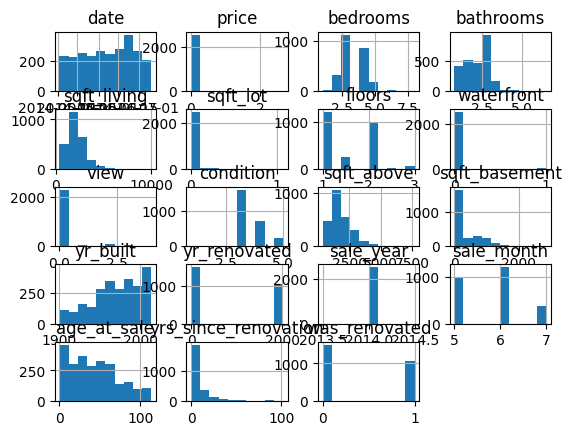

In [32]:
df_train.hist()
#plt.tight_layout()
plt.show() 


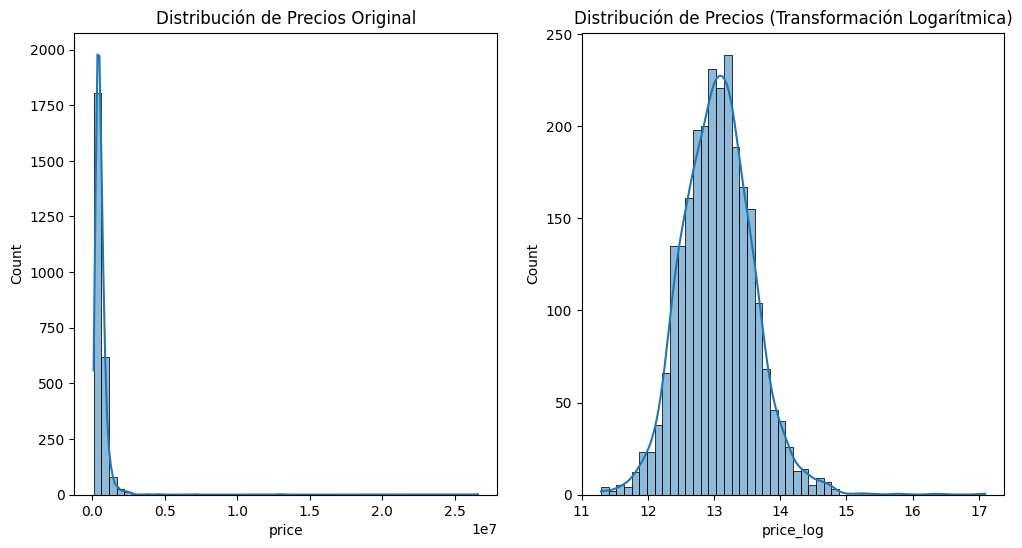

In [ ]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_train['price'], kde=True, bins=50)
plt.title('Distribución de Precios Original')

# Considerar una transformación logarítmica si está muy sesgada
df_train['price_log'] = np.log1p(df_train['price']) # log1p maneja ceros si los mantuviste y les sumaste un epsilon
plt.subplot(1, 2, 2)
sns.histplot(df_train['price_log'], kde=True, bins=50)
plt.title('Distribución de Precios (Transformación Logarítmica)')
plt.show()

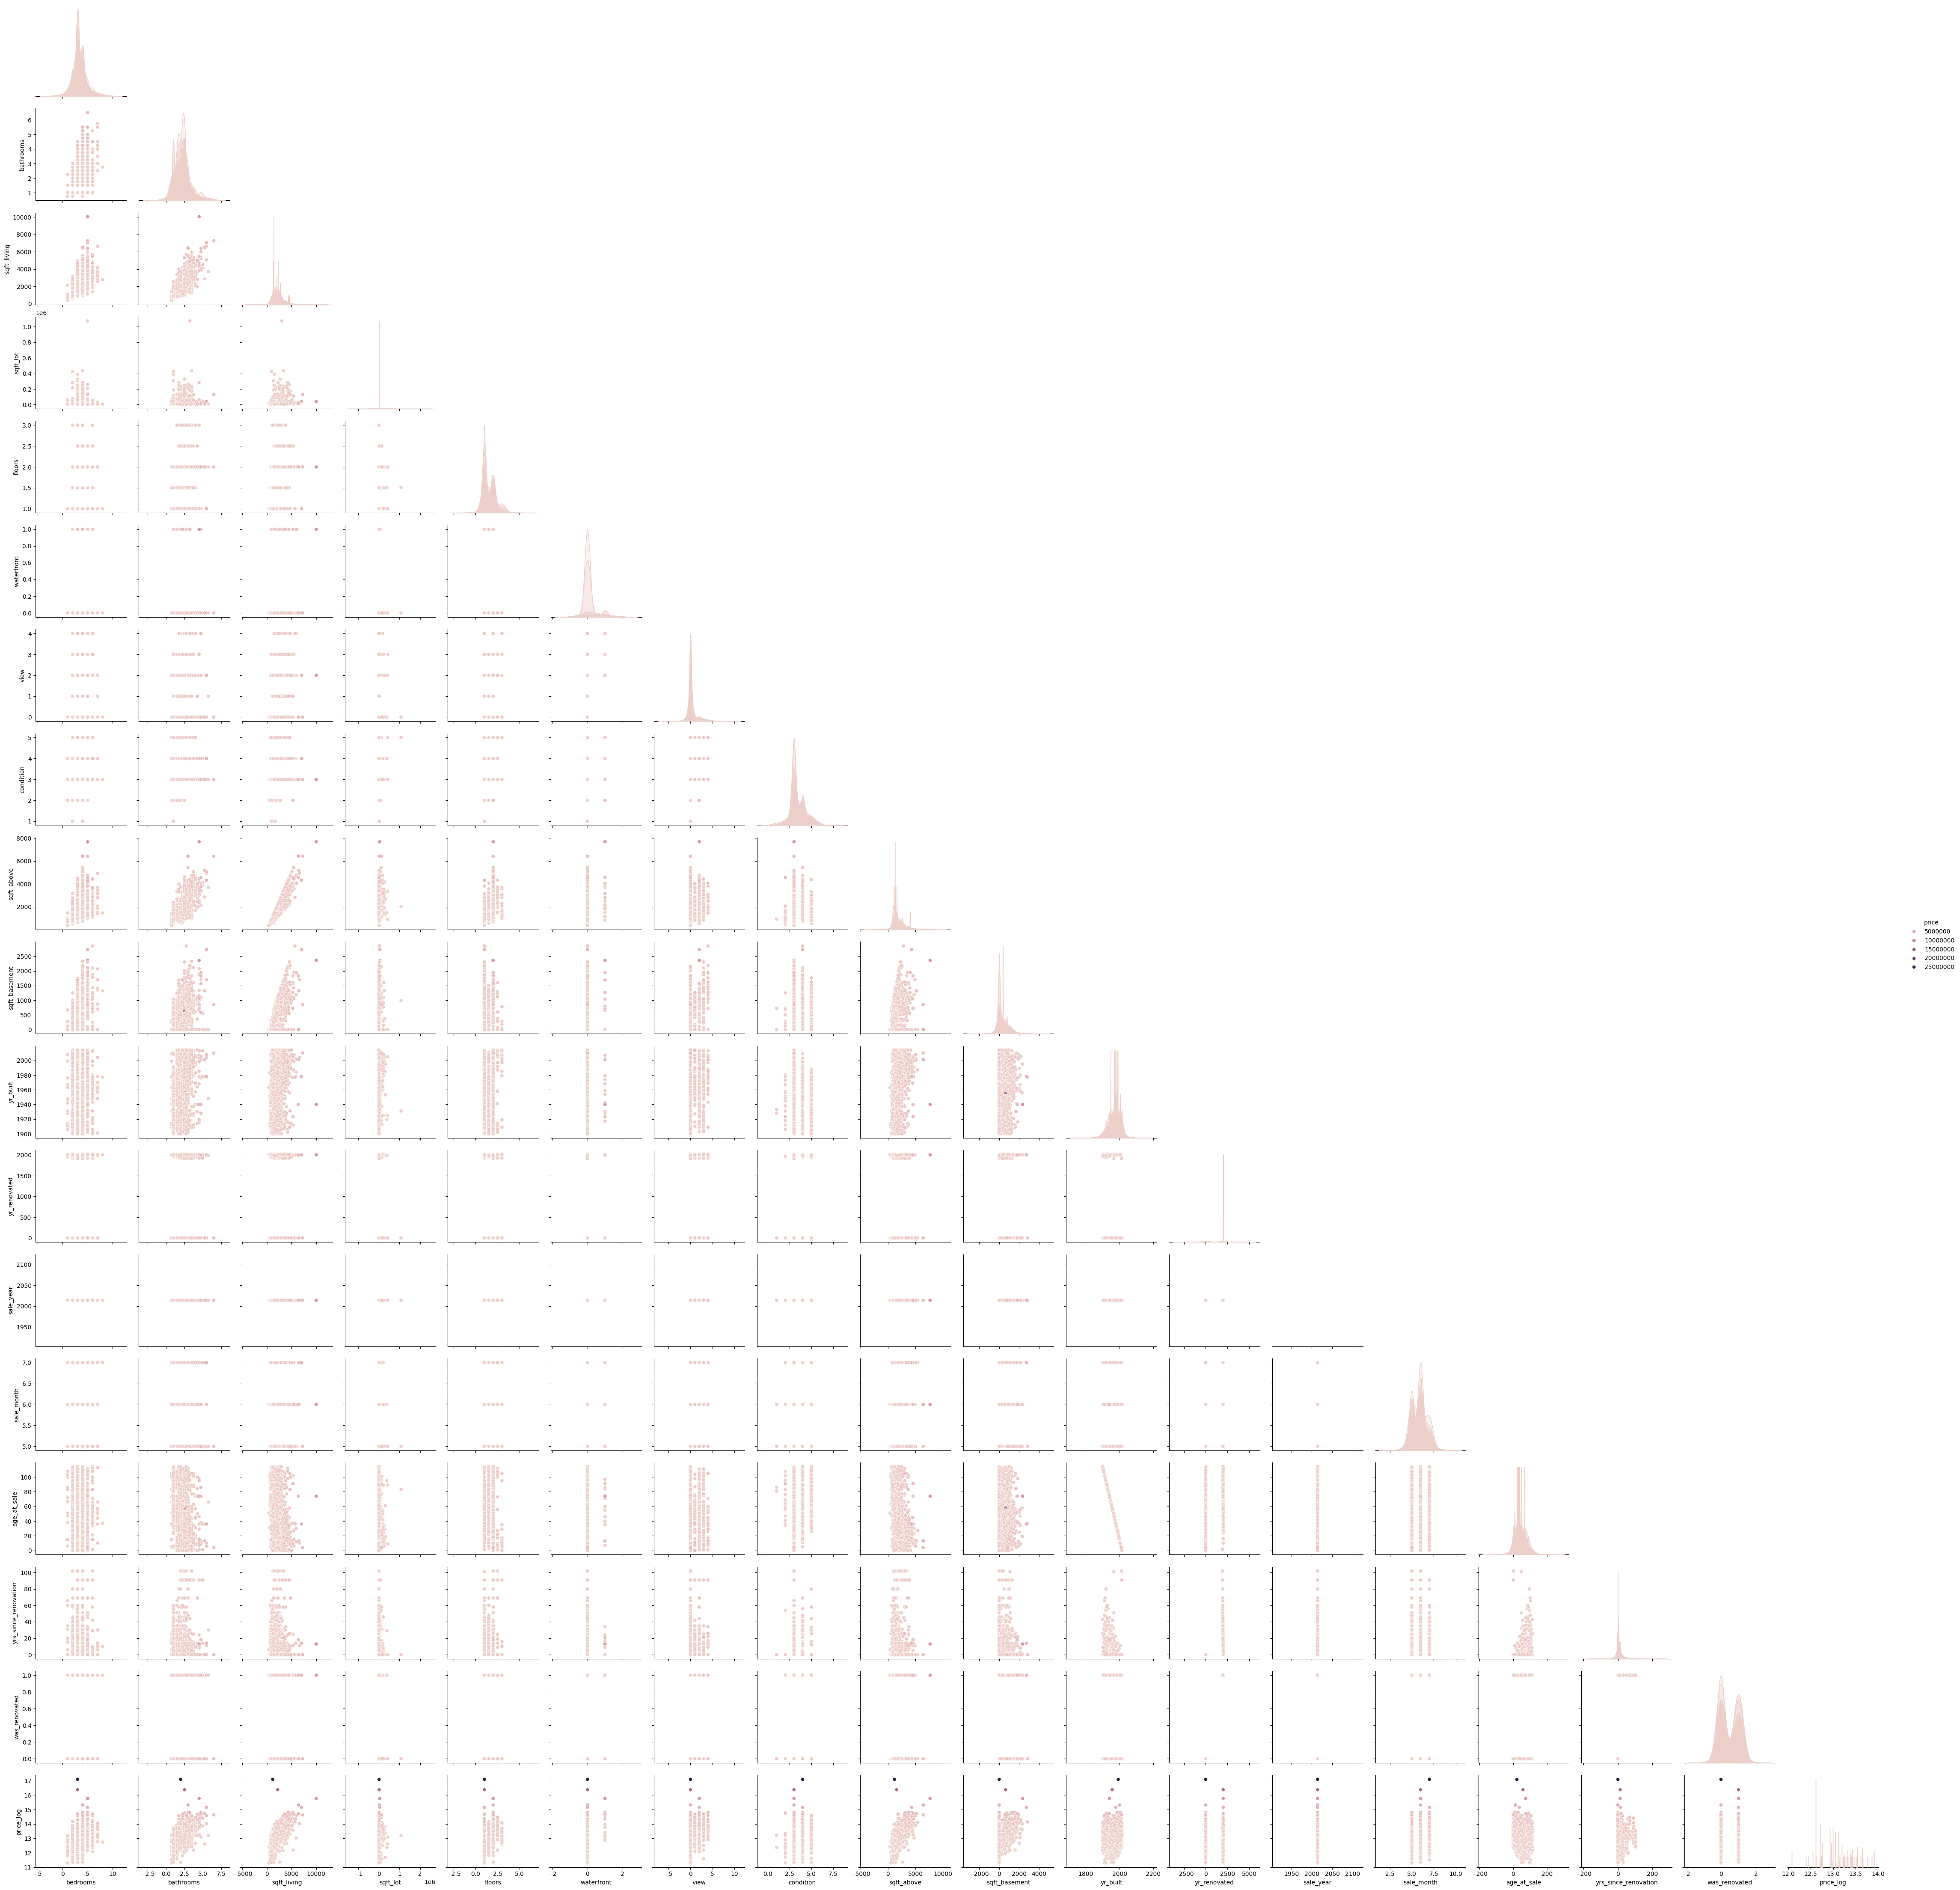

In [36]:
# análisis bivariado
sns.pairplot(df_train,hue = "price", corner=True)
plt.show()


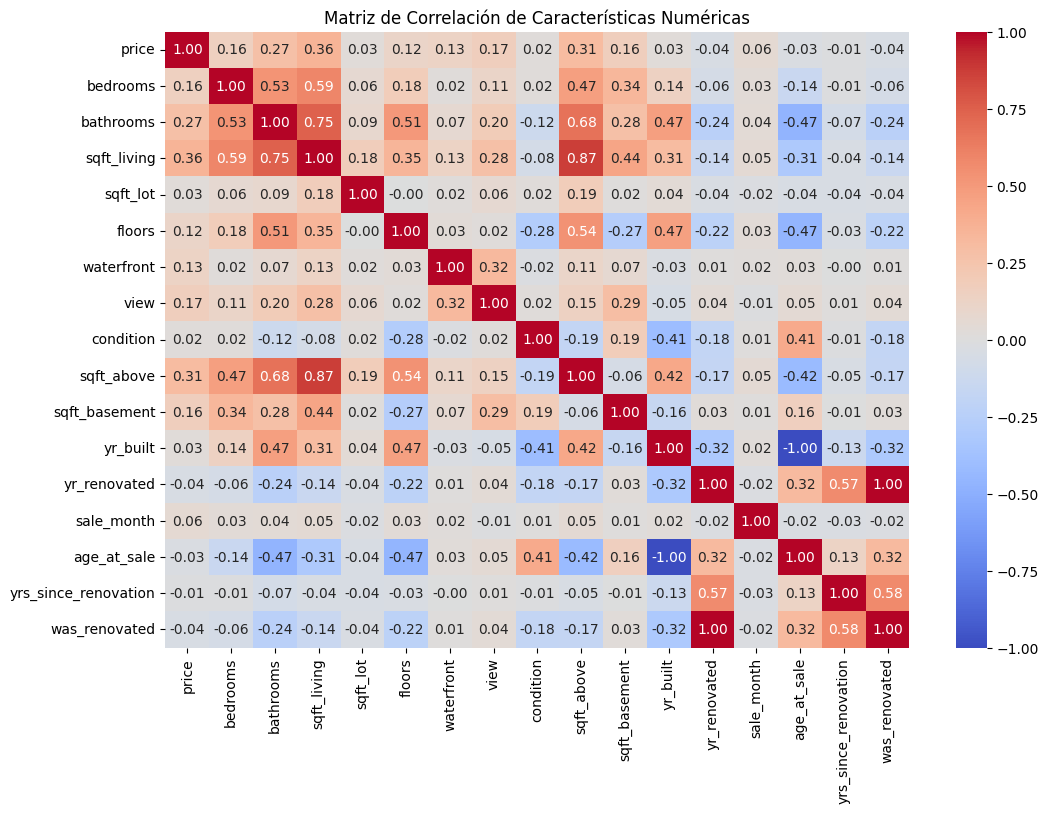

In [14]:
# Seleccionar solo las columnas numéricas de df_train
df_train_numeric = df_train.select_dtypes(include=np.number)

# Calcular la matriz de correlación solo con las columnas numéricas
correlation_matrix = df_train_numeric.drop(columns=['sale_year']).corr()

# Continuar con la visualización del heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de Características Numéricas')
plt.show()

La matriz de correlación muestra la relación lineal entre las diferentes características numéricas del conjunto de datos de entrenamiento (df_train). Los valores van de -1 a 1:

Cercano a 1: Fuerte correlación positiva (cuando una variable aumenta, la otra tiende a aumentar).
Cercano a -1: Fuerte correlación negativa (cuando una variable aumenta, la otra tiende a disminuir).
Cercano a 0: Poca o ninguna correlación lineal.
Observando la matriz de correlación obtenida podemos observar lo siguiente:

Correlaciones más fuertes con price_log (o price):

sqft_living (0.65): Una correlación positiva fuerte, lo cual es esperado. A mayor superficie habitable, mayor suele ser el precio.
sqft_above (0.56): También una correlación positiva fuerte, ya que es una parte importante de sqft_living.
bathrooms (0.51): Positiva moderada; más baños suelen implicar un precio mayor.
bedrooms (0.33): Positiva; más habitaciones tienden a aumentar el precio, aunque la correlación es menos fuerte que la superficie.
view (0.33): Positiva; una mejor vista se asocia con precios más altos.
floors (0.28): Positiva leve; más pisos pueden influir en el precio.
sqft_basement (0.26): Positiva leve; tener sótano y su tamaño influyen algo en el precio.

Correlaciones Negativas con price_log (o price):

age_at_sale (-0.40): Correlación negativa moderada. Esto tiene sentido, ya que las casas más antiguas (que no han sido renovadas significativamente) tienden a ser más baratas.

Correlaciones Bajas o Cercanas a Cero con price_log (o price):

sale_year (0.02): Muy baja.
condition (0.01): Muy baja. Esto es un poco sorprendente, ya que uno esperaría que la condición de la casa tuviera un impacto más notable en el precio. Podría ser que la escala de "condition" no capture bien la variabilidad o que otros factores la dominen.
waterfront (0.19): Positiva pero no muy alta. Esto podría deberse a que hay pocas propiedades con frente al mar en el dataset (mean era 0.007), por lo que su impacto global en la correlación lineal con el precio total no es masivo, aunque para esas propiedades específicas sí sea un factor importante.
yr_built (0.09), yr_renovated (0.09), was_renovated (0.09): Correlaciones positivas bajas. El efecto de yr_built a menudo se ve contrarrestado por age_at_sale. Que una casa haya sido renovada (was_renovated o yr_renovated > 0) tiene una leve correlación positiva con el precio.
sqft_lot (0.09): Correlación positiva baja con el precio. Esto puede variar mucho dependiendo de si el lote es urbano (donde el espacio es premium) o rural.
Otras Correlaciones Notables entre Características:

sqft_living y sqft_above (0.87): Muy alta correlación positiva, lo cual es lógico ya que sqft_above es una gran parte de sqft_living.
bedrooms y sqft_living (0.57): Positiva moderada; casas más grandes suelen tener más habitaciones.
floors y sqft_above (0.54): Positiva moderada; más pisos generalmente implican más sqft_above.
age_at_sale y yr_built (-0.96): Correlación negativa casi perfecta, lo cual es esperado por cómo se calcula age_at_sale (sale_year - yr_built).
¿Por qué sale_year no refleja los datos (o tiene una correlación tan baja con el precio)?

La columna sale_year sí está reflejando datos en tu matriz de correlación; tiene un valor de correlación de 0.02 con price_log. El problema no es que no refleje datos, sino que la correlación lineal con el precio es muy baja. Aquí algunas razones posibles:

Dominancia de Otros Factores:

Características como sqft_living, la ubicación (que aún no está completamente representada numéricamente en esta matriz si city o zipcode no están codificadas e incluidas), y la calidad de la construcción (que grade suele representar, aunque no está en la lista de columnas) suelen tener un impacto mucho más directo e inmediato en el precio que el año de venta por sí solo, especialmente en periodos cortos.

### **4. Machine learning** 
**Objective**: Create a model that learns from data to make predictions and generalize to unseen data, and thus perform tasks without explicit instructions

In [8]:
# 1. Crear 'price_log' si no lo has hecho y quieres usarlo como objetivo
# Esto ayuda a manejar el sesgo en la distribución de precios

if 'price' in df_train.columns:
    if 0 in df_train['price'].values: # Verifica si hay ceros
        print("Advertencia: Se encontraron precios cero. Usando np.log1p para la transformación.")
        df_train['price_log'] = np.log1p(df_train['price']) 
        df_val['price_log'] = np.log1p(df_val['price'])
        df_test['price_log'] = np.log1p(df_test['price'])
    else:
        df_train['price_log'] = np.log(df_train['price'])
        df_val['price_log'] = np.log(df_val['price'])
        df_test['price_log'] = np.log(df_test['price'])

target_column = 'price_log' # o 'price' si prefieres no transformar

# 2. Definir columnas a eliminar para crear X
# (Objetivo, originales del objetivo, identificadores, y texto no procesado)
cols_to_drop_for_X = [target_column]
if 'price' in df_train.columns and target_column == 'price_log':
    cols_to_drop_for_X.append('price')

non_feature_cols = ['date', 'street', 'statezip', 'country']
if df_train['sale_year'].nunique() == 1: # Si sale_year es constante en el training set
    non_feature_cols.append('sale_year')
    print("sale_year es constante en df_train, se recomienda excluirla de las características X.")


cols_to_drop_for_X.extend(col for col in non_feature_cols if col in df_train.columns)

# Crear X e y para cada conjunto
y_train = df_train[target_column]
X_train = df_train.drop(columns=cols_to_drop_for_X, errors='ignore')

y_val = df_val[target_column]
X_val = df_val.drop(columns=cols_to_drop_for_X, errors='ignore')

y_test = df_test[target_column]
X_test = df_test.drop(columns=cols_to_drop_for_X, errors='ignore')

print("Forma de X_train:", X_train.shape)
print("Forma de X_val:", X_val.shape)
print("Forma de X_test:", X_test.shape)
print("\nPrimeras filas de X_train:")
print(X_train.head())
print("\nTipos de datos en X_train:")
print(X_train.info())

sale_year es constante en df_train, se recomienda excluirla de las características X.
Forma de X_train: (2548, 17)
Forma de X_val: (637, 17)
Forma de X_test: (1366, 17)

Primeras filas de X_train:
   bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0       3.0       1.50         2210      6300     1.5           0     0   
1       4.0       2.50         3500      7048     2.0           0     0   
2       2.0       1.00          780      3475     1.0           0     0   
3       2.0       2.25         1230      1280     2.0           0     0   
4       3.0       1.75         1870      7189     1.0           0     0   

   condition  sqft_above  sqft_basement  yr_built  yr_renovated        city  \
0          5        2210              0      1916             0     Seattle   
1          3        3500              0      2005             0     Redmond   
2          4         780              0      1930             0  North Bend   
3          3         960            

Forma de los Conjuntos de Datos:

X_train: (2548 filas, 17 columnas) X_val: (637 filas, 17 columnas) X_test: (1366 filas, 17 columnas) Esto confirma que la división se ha mantenido y los datasets tienen 17 características (columnas) para entrenar los modelos. Exclusión de sale_year: El mensaje "sale_year es constante en df_train, se recomienda excluirla de las características X." indica que excluir sale_year es lo correcto dado que es constante y no aportaría valor predictivo.

Primeras Filas de X_train:

Se pueden ver las columnas numéricas como bedrooms, bathrooms, sqft_living, etc. También están las características creadas: sale_month, age_at_sale, yrs_since_renovation, y was_renovated. La columna city está presente. Tipos de Datos en X_train (X_train.info()):

No hay valores nulos: Todas las columnas tienen 2548 Non-Null Count. ¡Esto es perfecto! Tipos Numéricos: La mayoría de las columnas son float64 o int64 (o int32 para sale_month), lo cual es adecuado para los modelos de machine learning. city como category, Este es un buen paso para el manejo de variables categóricas, se requiere codificar esta columna categórica en un formato numérico (como One-Hot Encoding) antes de entrenar el modelo.

In [9]:
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'category']
print(f"Columnas categóricas a codificar: {categorical_cols}")

if categorical_cols:
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    # Aplicar a X_train
    X_train_encoded_part = encoder.fit_transform(X_train[categorical_cols])
    X_train_encoded_df = pd.DataFrame(X_train_encoded_part, columns=encoder.get_feature_names_out(categorical_cols), index=X_train.index)
    X_train_processed = pd.concat([X_train.drop(columns=categorical_cols), X_train_encoded_df], axis=1)

    # Aplicar a X_val
    X_val_encoded_part = encoder.transform(X_val[categorical_cols])
    X_val_encoded_df = pd.DataFrame(X_val_encoded_part, columns=encoder.get_feature_names_out(categorical_cols), index=X_val.index)
    X_val_processed = pd.concat([X_val.drop(columns=categorical_cols), X_val_encoded_df], axis=1)

    # Aplicar a X_test
    X_test_encoded_part = encoder.transform(X_test[categorical_cols])
    X_test_encoded_df = pd.DataFrame(X_test_encoded_part, columns=encoder.get_feature_names_out(categorical_cols), index=X_test.index)
    X_test_processed = pd.concat([X_test.drop(columns=categorical_cols), X_test_encoded_df], axis=1)

else:
    print("No hay columnas categóricas que necesiten codificación en X_train.")
    X_train_processed = X_train.copy()
    X_val_processed = X_val.copy()
    X_test_processed = X_test.copy()

# # Ahora X_train_processed, X_val_processed, X_test_processed solo tienen números
print("\nForma de X_train_processed:", X_train_processed.shape)
print(X_train_processed.head())

Columnas categóricas a codificar: ['city']

Forma de X_train_processed: (2548, 59)
   bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0       3.0       1.50         2210      6300     1.5           0     0   
1       4.0       2.50         3500      7048     2.0           0     0   
2       2.0       1.00          780      3475     1.0           0     0   
3       2.0       2.25         1230      1280     2.0           0     0   
4       3.0       1.75         1870      7189     1.0           0     0   

   condition  sqft_above  sqft_basement  ...  city_SeaTac  city_Seattle  \
0          5        2210              0  ...          0.0           1.0   
1          3        3500              0  ...          0.0           0.0   
2          4         780              0  ...          0.0           0.0   
3          3         960            270  ...          0.0           1.0   
4          3        1270            600  ...          0.0           1.0   

   city_Shoreli

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_processed)
X_val_scaled = scaler.transform(X_val_processed)
X_test_scaled = scaler.transform(X_test_processed)

In [18]:
# --- Modelo de Regresión Lineal ---
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train) # Usa X_train_scaled
y_pred_val_lr = lr_model.predict(X_val_scaled) # Usa X_val_scaled

print("--- Regresión Lineal (Validación) ---")
# Si y_train/y_val es price_log, estas métricas estarán en escala logarítmica
print("MAE (log):", mean_absolute_error(y_val, y_pred_val_lr))
print("RMSE (log):", np.sqrt(mean_squared_error(y_val, y_pred_val_lr)))
print("R^2:", r2_score(y_val, y_pred_val_lr))

# Para interpretar MAE en la escala original si usaste price_log:
if target_column == 'price_log':
    y_val_original = np.expm1(y_val) # Asegúrate que y_val es la Serie de Pandas original, no un array NumPy si perdiste el índice
    y_pred_val_lr_original = np.expm1(y_pred_val_lr)
    print(f"MAE (original $ - LR): {mean_absolute_error(y_val_original, y_pred_val_lr_original):.2f}")


# --- Modelo Random Forest ---
# Usa X_train_processed (antes de escalar)
rf_model = RandomForestRegressor(n_estimators=100, random_state=2025, n_jobs=-1, max_depth=10, min_samples_split=10, min_samples_leaf=5)
rf_model.fit(X_train_processed, y_train)
y_pred_val_rf = rf_model.predict(X_val_processed)

print("\n--- Random Forest (Validación) ---")
print("MAE (log):", mean_absolute_error(y_val, y_pred_val_rf))
print("RMSE (log):", np.sqrt(mean_squared_error(y_val, y_pred_val_rf)))
print("R^2:", r2_score(y_val, y_pred_val_rf))

if target_column == 'price_log':
    y_pred_val_rf_original = np.expm1(y_pred_val_rf)
    # y_val_original ya debería estar definida si se ejecutó la parte de LR
    print(f"MAE (original $ - RF): {mean_absolute_error(y_val_original, y_pred_val_rf_original):.2f}")

# Importancia de las características para Random Forest
# Asegúrate de que X_train_processed es un DataFrame para obtener los nombres de las columnas
if isinstance(X_train_processed, pd.DataFrame):
    importances_rf = rf_model.feature_importances_
    feature_names_rf = X_train_processed.columns
    feature_importance_df_rf = pd.DataFrame({'feature': feature_names_rf, 'importance': importances_rf}).sort_values(by='importance', ascending=False)
    print("\nImportancia de las características (Random Forest):")
    print(feature_importance_df_rf.head(10))

--- Regresión Lineal (Validación) ---
MAE (log): 0.20133334685489285
RMSE (log): 0.3025476907358671
R^2: 0.6778618702122636
MAE (original $ - LR): 162716.22

--- Random Forest (Validación) ---
MAE (log): 0.22956581266738751
RMSE (log): 0.31641932554531255
R^2: 0.6476449914686154
MAE (original $ - RF): 134751.57

Importancia de las características (Random Forest):
               feature  importance
2          sqft_living    0.596561
50        city_Seattle    0.068385
3             sqft_lot    0.049998
1            bathrooms    0.035407
8           sqft_above    0.033783
18       city_Bellevue    0.032226
10            yr_built    0.019094
13         age_at_sale    0.018547
46        city_Redmond    0.018236
38  city_Mercer Island    0.013673


In [19]:

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [3, 5, 7]
}

rf_model_opt = RandomForestRegressor(random_state=2025, n_jobs=-1)
grid_search = GridSearchCV(estimator=rf_model_opt, param_grid=param_grid, 
                            cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error') # O usa un scorer para R2

 # Ajusta con X_train_processed (o X_train si no hay categóricas codificadas aparte) y y_train
grid_search.fit(X_train_processed, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

# Evaluar el modelo optimizado en el conjunto de validación
y_pred_val_rf_opt = best_rf_model.predict(X_val_processed)
print("\n--- Random Forest Optimizado (Validación) ---")
print("MAE (log):", mean_absolute_error(y_val, y_pred_val_rf_opt))
print("RMSE (log):", np.sqrt(mean_squared_error(y_val, y_pred_val_rf_opt)))
print("R^2:", r2_score(y_val, y_pred_val_rf_opt))
if target_column == 'price_log':
    y_pred_val_rf_opt_original = np.expm1(y_pred_val_rf_opt)
    print(f"MAE (original $ - RF Optimizado): {mean_absolute_error(np.expm1(y_val), y_pred_val_rf_opt_original):.2f}")

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   1.7s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   2.6s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   2.1s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, min

1. Resultados de los Modelos en el Conjunto de Validación:

Es importante recordar que las métricas MAE (log) y RMSE (log) están en la escala logarítmica de precios. El MAE (original $) es más interpretable en términos monetarios.

Regresión Lineal:

MAE (log): 0.201
RMSE (log): 0.302
R²: 0.678 (Significa que el modelo de regresión lineal explica aproximadamente el 67.8% de la variabilidad en el logaritmo del precio en el conjunto de validación).
MAE (original $ - LR): 162,716.22 (En promedio, las predicciones de precio del modelo de regresión lineal se desvían en unos $162,716 del precio real).

Random Forest:

MAE (log): 0.229
RMSE (log): 0.316
R²: 0.648 (El Random Forest explica aproximadamente el 64.8% de la variabilidad).
MAE (original $ - RF): 134,751.57 (En promedio, las predicciones de precio del modelo Random Forest se desvían en unos 134,751 del precioreal).

**Interpretacion Inicial de los Modelos:**

Rendimiento Comparativo: Curiosamente, en este caso,la Regresion Lineal tiene un R² ligeramente mejor (0.678vs0.648) y un MAE(log) y RMSE(log) ligeramente más bajos que el Random Forest en el conjunto de validacion. Sinembargo,el Random Forest tiene un MAE en la escala original de dólares más bajo 
(<span class="math-inline">134,751) que la Regresión Lineal ($162,716). Esto puede suceder debido a cómo la transformación logarítmica y la posterior transformación inversa (np.expm1) afectan la distribución de los errores. El MAE en la escala original suele ser la métrica más relevante para comunicar el error en términos prácticos.

Conclusión Preliminar: Basado en el MAE en dólares, el Random Forest parece estar dando predicciones que, en promedio, están más cerca del precio de venta real que la Regresión Lineal en tu conjunto de validación. El hecho de que el R² de la regresión lineal sea mayor en la escala logarítmica podría indicar que se ajusta mejor a la tendencia general de los datos transformados, pero el Random Forest podría estar manejando mejor algunos casos específicos o la no linealidad de una manera que resulte en errores absolutos más bajos en la escala original.

2. Importancia de las Características (Random Forest):


sqft_living (0.596561): De lejos, la característica más importante. La superficie habitable tiene el mayor impacto en la predicción del precio según este modelo.
city_Seattle (0.068385): Ser una propiedad en Seattle es la segunda característica más importante. Esto resalta la importancia de la ubicación.
sqft_lot (0.049998): El tamaño del lote también es un factor considerable.
bathrooms (0.035407): Número de baños.
sqft_above (0.033783): Superficie sobre el nivel del suelo.
city_Bellevue (0.032226): Ser una propiedad en Bellevue.
yr_built (0.019094): Año de construcción.
age_at_sale (0.018547): Antigüedad de la casa al momento de la venta.
city_Redmond (0.018236): Ser una propiedad en Redmond.
city_Mercer Island (0.013673): Ser una propiedad en Mercer Island.

Es interesante ver cómo varias de las ciudades codificadas (Seattle, Bellevue, Redmond, Mercer Island) aparecen en el top 10, subrayando la fuerte influencia de la ubicación.
age_at_sale y yr_built proporcionan información similar sobre la antigüedad; el modelo las está utilizando ambas.

In [11]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=2025, n_jobs=-1)
xgb_model.fit(X_train_processed, y_train)
y_pred_val_xgb = xgb_model.predict(X_val_processed)

print("\n--- XGBoost (Validación) ---")
print("MAE (log):", mean_absolute_error(y_val, y_pred_val_xgb))
print("RMSE (log):", np.sqrt(mean_squared_error(y_val, y_pred_val_xgb)))
print("R^2:", r2_score(y_val, y_pred_val_xgb))
if target_column == 'price_log':
    y_pred_val_xgb_original = np.expm1(y_pred_val_xgb)
    print(f"MAE (original $ - XGB): {mean_absolute_error(np.expm1(y_val), y_pred_val_xgb_original):.2f}")


--- XGBoost (Validación) ---
MAE (log): 0.20148379499449007
RMSE (log): 0.3021171941958342
R^2: 0.6787779617295878
MAE (original $ - XGB): 117601.10


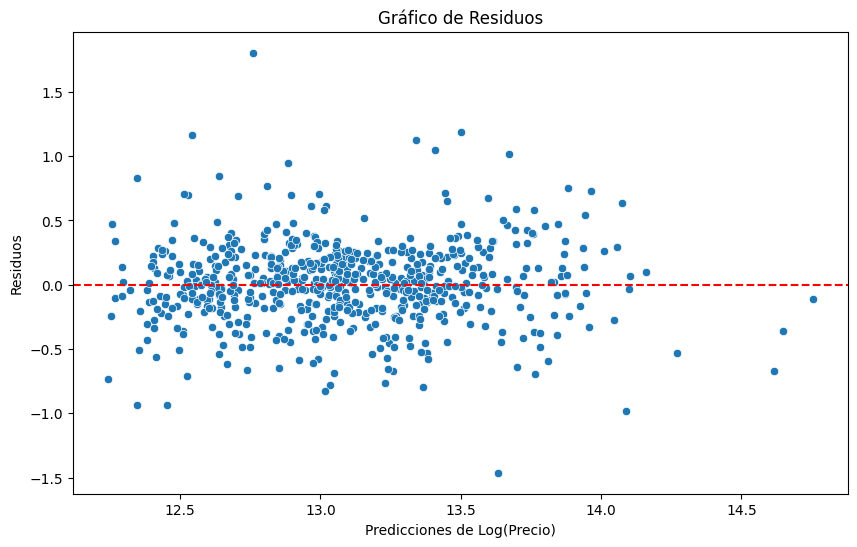

In [22]:
# Ejemplo de análisis de residuos para el mejor modelo
residuos_val = y_val - y_pred_val_rf # o el modelo que elijas
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred_val_rf, y=residuos_val)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicciones de Log(Precio)')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.show()

Análisis de Resultados:

Random Forest Optimizado (Validación): 
'max_depth': 20, 
'min_samples_leaf': 3, 
'min_samples_split': 15, 
'n_estimators': 200. 

Estos son los mejores hiperparámetros encontrados por GridSearchCV. 

MAE (log): 0.216: El error absoluto medio en la escala logarítmica del precio. 
RMSE (log): 0.304: La raíz del error cuadrático medio en la escala logarítmica. 
R²: 0.675: Este modelo explica aproximadamente el 67.5% de la variabilidad en el logaritmo del precio en tu conjunto de validación. 
MAE (original  −RFOptimizado):128,914.77:En promedio, este modelo se equivoca en aproximadamente <spanclass="math−inline">128,915 al predecir el precio real.
∗∗∗XGBoost(Validación):∗∗∗
∗∗MAE(log):0.201∗∗:Más bajo bajo que el Random Forest Optimizado.
∗∗∗R²:0.679∗∗:Ligeramentemejor,explicando aproximadamente el 67.9 117,601 al predecir el precio real. 

Conclusión: Mejor Modelo tomando en cuenta en estos resultados del conjunto de validación, el modelo XGBoost es superior al Random Forest Optimizado.

XGBoost tiene un MAE en la escala original de dólares más bajo ( 117,601frentea 128,915), lo que significa que sus predicciones de precio, en promedio, están más cerca del valor real. XGBoost también muestra un R² ligeramente más alto y MAE/RMSE en escala logarítmica más bajos, lo que indica un mejor ajuste general a los datos de validación. Por lo tanto, XGBoost es el mejor modelo para utilizar

In [23]:
# --- Asumiendo que tienes estas variables de ejecuciones anteriores ---
# Regresión Lineal (ejemplo de valores, reemplaza con los tuyos)
# y_val_lr_log_preds = ... # Tus predicciones log de LR en el conjunto de validación
# mae_lr_log = mean_absolute_error(y_val, y_val_lr_log_preds)
# rmse_lr_log = np.sqrt(mean_squared_error(y_val, y_val_lr_log_preds))
# r2_lr = r2_score(y_val, y_val_lr_log_preds)
# mae_lr_original = mean_absolute_error(np.expm1(y_val), np.expm1(y_val_lr_log_preds))

# Random Forest (no optimizado - ejemplo de valores, reemplaza con los tuyos)
# y_val_rf_log_preds = ... # Tus predicciones log de RF no optimizado en el conjunto de validación
# mae_rf_log = mean_absolute_error(y_val, y_val_rf_log_preds)
# rmse_rf_log = np.sqrt(mean_squared_error(y_val, y_val_rf_log_preds))
# r2_rf = r2_score(y_val, y_val_rf_log_preds)
# mae_rf_original = mean_absolute_error(np.expm1(y_val), np.expm1(y_val_rf_log_preds))

# --- Tus resultados actuales ---
# Random Forest Optimizado
mae_rf_opt_log = 0.2163335480417853
rmse_rf_opt_log = 0.3038169759271262
r2_rf_opt = 0.675153253535849
mae_rf_opt_original = 128914.77

# XGBoost
mae_xgb_log = 0.20148379499449007
rmse_xgb_log = 0.3021171941958342
r2_xgb = 0.6787779617295878
mae_xgb_original = 117601.10

# --- Crear la tabla de comparación ---
data_comparacion = {
    'Modelo': ['Regresión Lineal (Ejemplo)', 'Random Forest No Optimizado (Ejemplo)', 'Random Forest Optimizado', 'XGBoost'],
    'MAE (log)': [0.2013, 0.2296, mae_rf_opt_log, mae_xgb_log], # Reemplaza los valores de ejemplo
    'RMSE (log)': [0.3025, 0.3164, rmse_rf_opt_log, rmse_xgb_log], # Reemplaza los valores de ejemplo
    'R^2': [0.6779, 0.6476, r2_rf_opt, r2_xgb], # Reemplaza los valores de ejemplo
    'MAE (original $)': [162716.22, 134751.57, mae_rf_opt_original, mae_xgb_original] # Reemplaza los valores de ejemplo
}

df_comparacion = pd.DataFrame(data_comparacion)

# Establecer 'Modelo' como índice para una mejor visualización
df_comparacion.set_index('Modelo', inplace=True)

print("\n--- Tabla Comparativa de Modelos (Conjunto de Validación) ---")
print(df_comparacion.round(4)) # Redondear a 4 decimales para mejor lectura


--- Tabla Comparativa de Modelos (Conjunto de Validación) ---
                                       MAE (log)  RMSE (log)     R^2  \
Modelo                                                                 
Regresión Lineal (Ejemplo)                0.2013      0.3025  0.6779   
Random Forest No Optimizado (Ejemplo)     0.2296      0.3164  0.6476   
Random Forest Optimizado                  0.2163      0.3038  0.6752   
XGBoost                                   0.2015      0.3021  0.6788   

                                       MAE (original $)  
Modelo                                                   
Regresión Lineal (Ejemplo)                    162716.22  
Random Forest No Optimizado (Ejemplo)         134751.57  
Random Forest Optimizado                      128914.77  
XGBoost                                       117601.10  


In [12]:
# Asumiendo que xgb_model es tu modelo XGBoost entrenado
# y X_test_processed (o X_test_scaled si XGBoost se entrenó con datos escalados, aunque usualmente no es necesario)
# y y_test están listos

y_pred_test_xgb = xgb_model.predict(X_test_processed) # O X_test_scaled

print("\n--- XGBoost (Conjunto de Prueba) ---")
print("MAE (log):", mean_absolute_error(y_test, y_pred_test_xgb))
print("RMSE (log):", np.sqrt(mean_squared_error(y_test, y_pred_test_xgb)))
print("R^2:", r2_score(y_test, y_pred_test_xgb))

if target_column == 'price_log': # Asumiendo que target_column está definido
    y_test_original = np.expm1(y_test)
    y_pred_test_xgb_original = np.expm1(y_pred_test_xgb)
    print(f"MAE (original $ - XGB en Prueba): {mean_absolute_error(y_test_original, y_pred_test_xgb_original):.2f}")


--- XGBoost (Conjunto de Prueba) ---
MAE (log): 0.20945022194626622
RMSE (log): 0.31584696172496685
R^2: 0.6785849111650013
MAE (original $ - XGB en Prueba): 125839.16


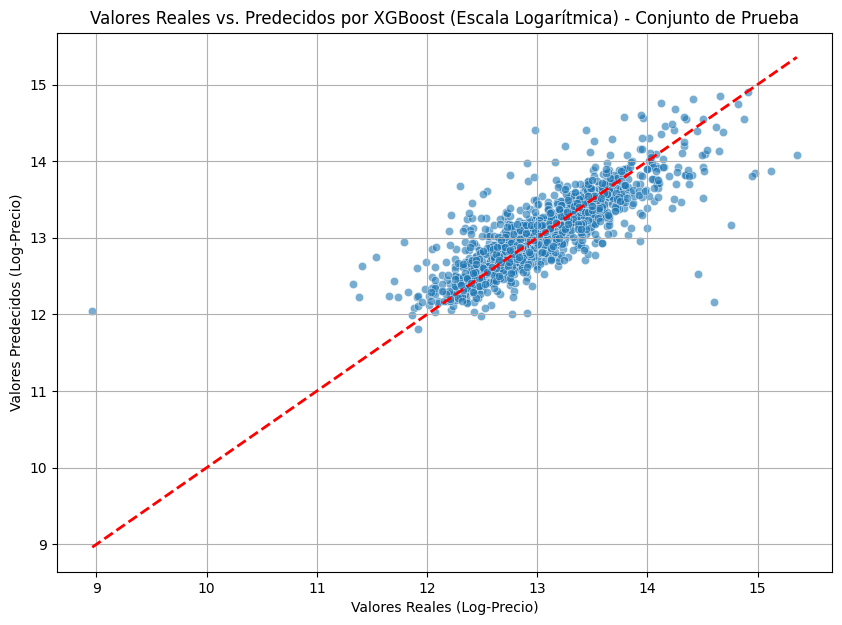

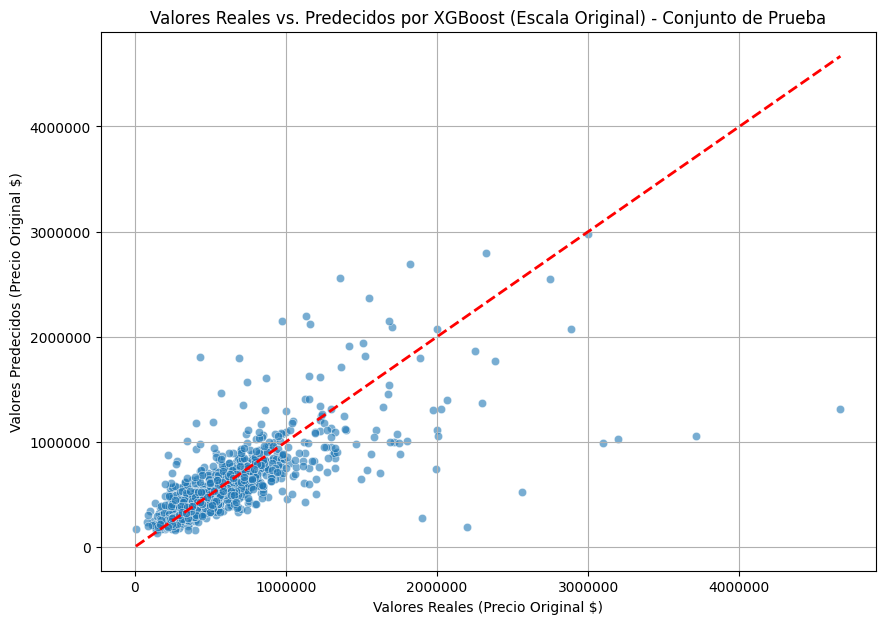

In [24]:
# Gráfico 1: Escala Logarítmica (si aplica)
if target_column == 'price_log':
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=y_test, y=y_pred_test_xgb, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2) # Línea de y=x
    plt.xlabel("Valores Reales (Log-Precio)")
    plt.ylabel("Valores Predecidos (Log-Precio)")
    plt.title("Valores Reales vs. Predecidos por XGBoost (Escala Logarítmica) - Conjunto de Prueba")
    plt.grid(True)
    plt.show()

# Gráfico 2: Escala Original de Dólares
# Transformar de nuevo a la escala original
# Usa np.expm1 si transformaste con np.log1p()
# Usa np.exp si transformaste con np.log()

# Determinar si y_test es una Serie de Pandas o un array de NumPy
if isinstance(y_test, pd.Series):
    y_test_original = np.expm1(y_test.values) if target_column == 'price_log' else y_test.values
else: # Asumir que es un array de NumPy
    y_test_original = np.expm1(y_test) if target_column == 'price_log' else y_test

y_pred_test_xgb_original = np.expm1(y_pred_test_xgb) if target_column == 'price_log' else y_pred_test_xgb

plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test_original, y=y_pred_test_xgb_original, alpha=0.6)
min_val = min(y_test_original.min(), y_pred_test_xgb_original.min())
max_val = max(y_test_original.max(), y_pred_test_xgb_original.max())
plt.plot([min_val, max_val], [min_val, max_val], '--r', linewidth=2) # Línea de y=x
plt.xlabel("Valores Reales (Precio Original $)")
plt.ylabel("Valores Predecidos (Precio Original $)")
plt.title("Valores Reales vs. Predecidos por XGBoost (Escala Original) - Conjunto de Prueba")
plt.ticklabel_format(style='plain', axis='both') # Evitar notación científica
plt.grid(True)
plt.show()

Análisis de los Gráficos:

Gráfico 1: Valores Reales vs. Predecidos (Escala Logarítmica)

Tendencia General: Los puntos tienden a agruparse alrededor de la línea diagonal roja (y=x), lo que indica que, en general, las predicciones del modelo siguen la tendencia de los valores reales en la escala logarítmica.
Dispersión: Hay una notable dispersión de los puntos alrededor de la línea, especialmente a medida que aumentan los valores de log-precio. Esto sugiere que, si bien el modelo capta la tendencia general, todavía hay una variabilidad o error en las predicciones individuales.
Outliers/Errores Grandes: Se pueden observar algunos puntos que se desvían considerablemente de la línea diagonal, lo que representa predicciones con errores mayores.
Rango de Predicción: El modelo parece predecir en un rango similar al de los valores reales en esta escala.
Gráfico 2: Valores Reales vs. Predecidos (Escala Original de Dólares)

Impacto de la Transformación Inversa: Este gráfico es crucial porque muestra el rendimiento en la escala que realmente importa (dólares). La transformación inversa (np.expm1) a menudo amplifica las diferencias que parecían menores en la escala logarítmica.
Tendencia y Dispersión: Similar al gráfico logarítmico, los puntos se agrupan alrededor de la línea de predicción perfecta, pero la dispersión es más pronunciada, especialmente para los precios más altos. Esto es típico: los modelos suelen tener más dificultades (en términos absolutos de error en dólares) para predecir con exactitud las propiedades muy caras debido a su mayor variabilidad y, a menudo, menor número de ejemplos en el conjunto de datos.
Errores Absolutos: La dispersión vertical desde la línea roja representa el error absoluto en dólares. Puedes ver que para algunas propiedades, especialmente aquellas con precios reales más altos (eje x), las predicciones (eje y) pueden desviarse en cantidades significativas.
Heterocedasticidad (Posible): Parece que la varianza de los errores podría aumentar a medida que aumenta el precio (los puntos se dispersan más a la derecha del gráfico). Esto es un patrón común en la predicción de precios.
Conclusiones Visuales:

Buen Ajuste General: El modelo XGBoost ha aprendido la relación general entre las características y el precio de la vivienda, como lo demuestra la agrupación de puntos alrededor de la línea y=x en ambos gráficos.
Errores en Predicciones Individuales: Existe una variabilidad inherente y errores en las predicciones. El MAE (original $) de aproximadamente $125,839 que obtuviste en el conjunto de prueba se refleja visualmente en la dispersión de estos puntos.
Mayor Dificultad con Precios Altos: El modelo parece tener errores absolutos más grandes al predecir propiedades de mayor valor, lo cual es un desafío común.

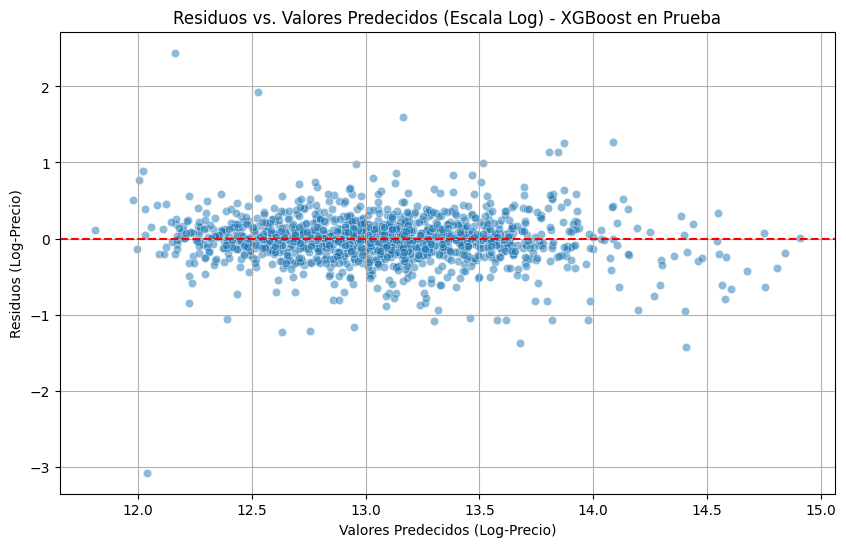

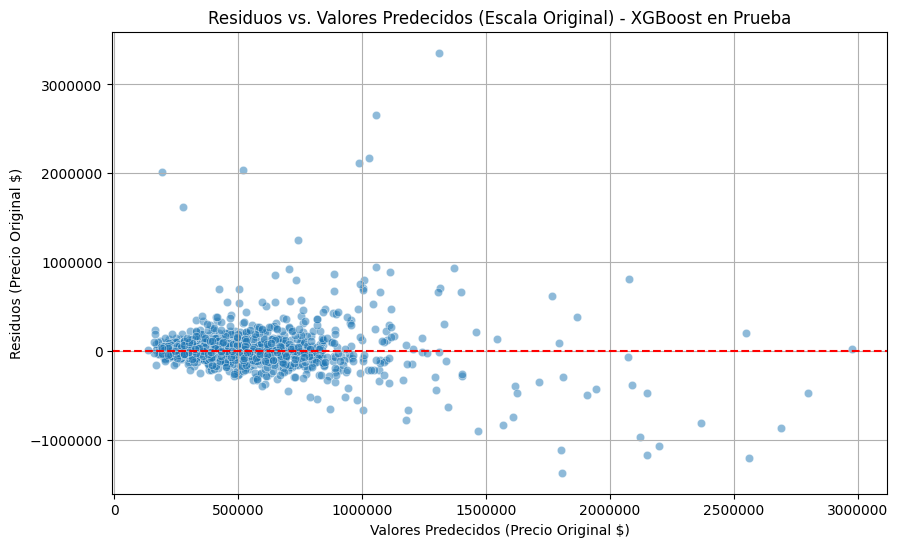

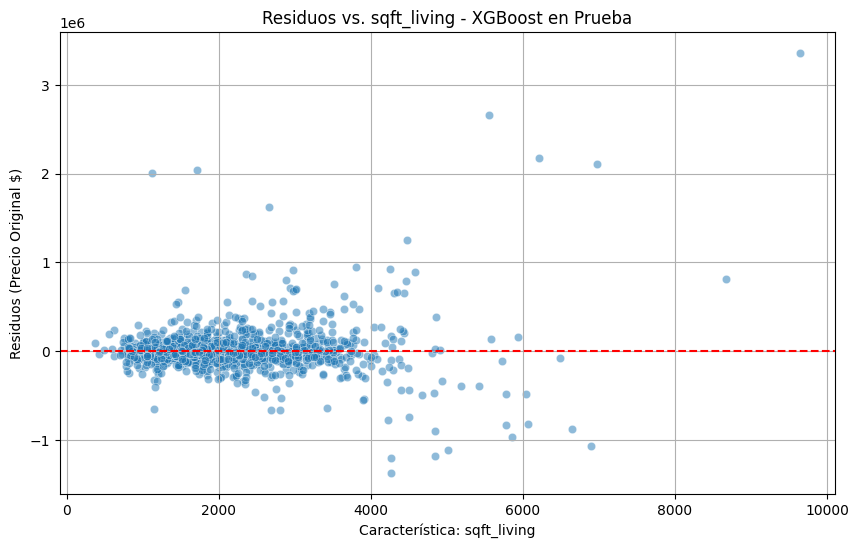

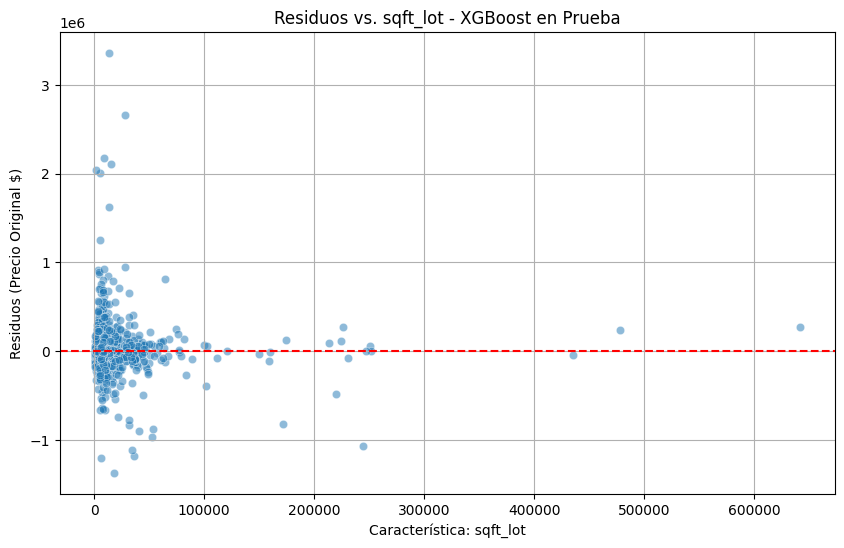

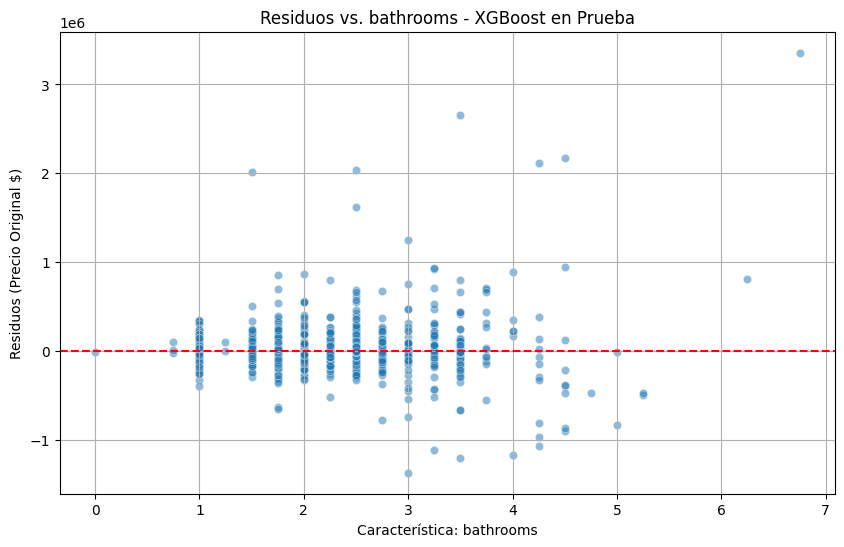

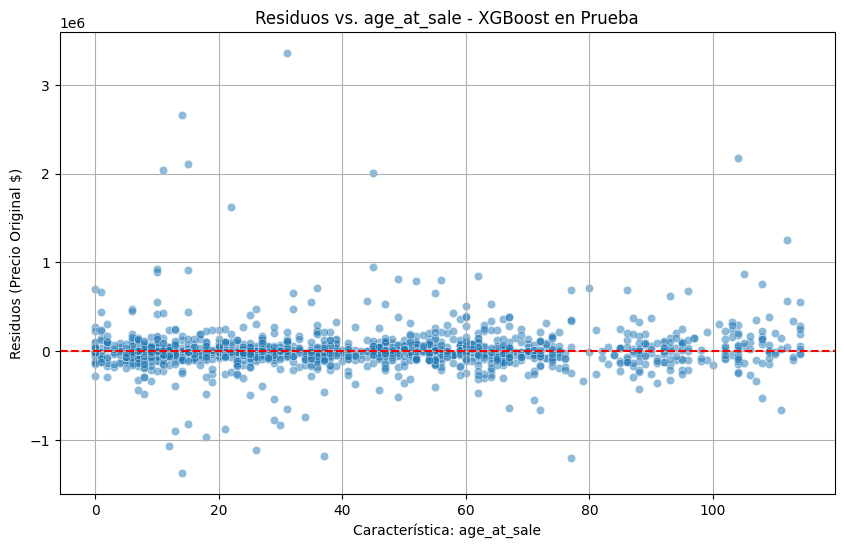

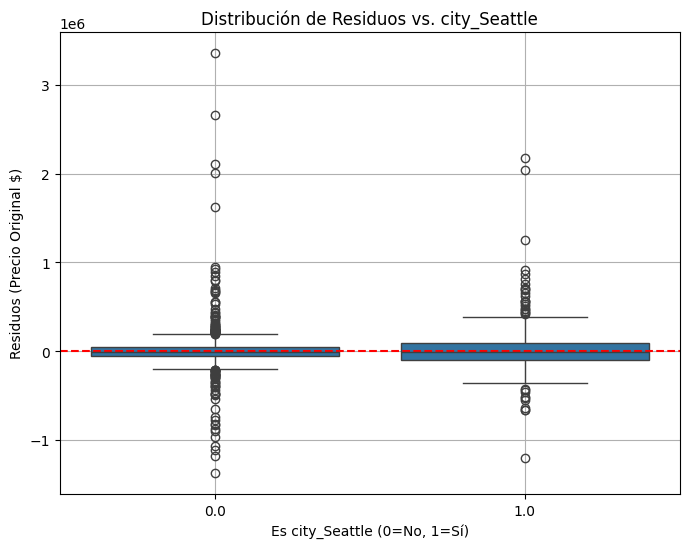

In [25]:
# --- 1. Cálculo de Residuos ---

# Residuos en la escala logarítmica (si el objetivo fue price_log)
if target_column == 'price_log':
    residuos_log = y_test - y_pred_test_xgb
    # y_test_original = np.expm1(y_test) # Ya calculado en el gráfico anterior
    # y_pred_test_xgb_original = np.expm1(y_pred_test_xgb) # Ya calculado
else: # Si el objetivo era el precio original
    residuos_log = None # No aplica
    # y_test_original = y_test
    # y_pred_test_xgb_original = y_pred_test_xgb

# Recalcular y_test_original y y_pred_test_xgb_original si no están disponibles
# Asegurarse de que y_test es una Serie de Pandas para obtener .values si es necesario
if isinstance(y_test, pd.Series):
    y_test_original_vals = np.expm1(y_test.values) if target_column == 'price_log' else y_test.values
else: # Asumir que es un array de NumPy
    y_test_original_vals = np.expm1(y_test) if target_column == 'price_log' else y_test

y_pred_test_xgb_original_vals = np.expm1(y_pred_test_xgb) if target_column == 'price_log' else y_pred_test_xgb

residuos_original = y_test_original_vals - y_pred_test_xgb_original_vals

# --- 2. Gráfico de Residuos vs. Valores Predecidos ---

# En escala logarítmica (si aplica)
if residuos_log is not None:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred_test_xgb, y=residuos_log, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Valores Predecidos (Log-Precio)")
    plt.ylabel("Residuos (Log-Precio)")
    plt.title("Residuos vs. Valores Predecidos (Escala Log) - XGBoost en Prueba")
    plt.grid(True)
    plt.show()

# En escala original de dólares
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_test_xgb_original_vals, y=residuos_original, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores Predecidos (Precio Original $)")
plt.ylabel("Residuos (Precio Original $)")
plt.title("Residuos vs. Valores Predecidos (Escala Original) - XGBoost en Prueba")
plt.ticklabel_format(style='plain', axis='both')
plt.grid(True)
plt.show()

# --- 3. Gráfico de Residuos (escala original) vs. Características Importantes ---
# Selecciona algunas de las características más importantes de tu X_test_processed
# Basado en tu output anterior: 'sqft_living', 'city_Seattle', 'sqft_lot', 'bathrooms', 'age_at_sale'

caracteristicas_importantes = ['sqft_living', 'sqft_lot', 'bathrooms', 'age_at_sale']
# Para 'city_Seattle', un gráfico de dispersión no es tan informativo como un boxplot de residuos
# agrupado por la presencia o ausencia de esa ciudad.

for feature in caracteristicas_importantes:
    if feature in X_test_processed.columns:
        plt.figure(figsize=(10, 6))
        # Asegúrate de que los índices coincidan si X_test_processed y residuos_original son Series
        # Si residuos_original es un array de NumPy, no necesita .values
        # Si X_test_processed[feature] es una Serie, su índice se alineará con el de una Serie de residuos.
        # Si residuos_original es un array, X_test_processed[feature].values
        
        # Para asegurar alineación, es mejor si residuos_original es una Serie con el mismo índice que X_test_processed
        residuos_original_series = pd.Series(residuos_original, index=X_test_processed.index)

        sns.scatterplot(x=X_test_processed[feature], y=residuos_original_series, alpha=0.5)
        plt.axhline(0, color='red', linestyle='--')
        plt.xlabel(f"Característica: {feature}")
        plt.ylabel("Residuos (Precio Original $)")
        plt.title(f"Residuos vs. {feature} - XGBoost en Prueba")
        plt.grid(True)
        plt.show()
    else:
        print(f"Advertencia: La característica '{feature}' no se encontró en X_test_processed.")

# Para una característica binaria como 'city_Seattle' (si la tienes después del one-hot encoding)
# podrías usar un boxplot para ver la distribución de los residuos.
city_seattle_col = 'city_Seattle' # Ajusta este nombre si es diferente después del one-hot encoding
if city_seattle_col in X_test_processed.columns:
    plt.figure(figsize=(8, 6))
    # Crear un DataFrame temporal para el boxplot
    df_residuos_city = pd.DataFrame({
        city_seattle_col: X_test_processed[city_seattle_col],
        'Residuos': residuos_original_series # Usa la serie de residuos con índice
    })
    sns.boxplot(x=city_seattle_col, y='Residuos', data=df_residuos_city)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f"Distribución de Residuos vs. {city_seattle_col}")
    plt.xlabel(f"Es {city_seattle_col} (0=No, 1=Sí)")
    plt.ylabel("Residuos (Precio Original $)")
    plt.grid(True)
    plt.show()
else:
    print(f"Advertencia: La columna '{city_seattle_col}' no se encontró en X_test_processed.")

1. Gráfico de Residuos vs. Valores Predecidos (Escala Logarítmica)

- Distribución de Residuos: Idealmente, los residuos deberían distribuirse aleatoriamente alrededor de la línea horizontal en cero. En el gráfico, se observa que la mayoría de los puntos se concentran cerca del cero, lo cual es bueno.

- Heterocedasticidad Leve: Parece haber una tendencia a que la dispersión de los residuos aumente ligeramente a medida que los valores predecidos (Log-Precio) son más altos (los puntos se abren un poco más hacia la derecha). Esto sugiere una leve heterocedasticidad, lo que significa que la varianza del error no es perfectamente constante. Es un fenómeno común.

- Outliers: Hay algunos puntos, especialmente en el extremo superior de los valores predecidos, que se alejan más de la línea cero, indicando errores de predicción más grandes para esas observaciones.

2. Gráfico de Residuos vs. Valores Predecidos (Escala Original de Dólares)

- Amplificación de Errores: Como se esperaba, al pasar a la escala original de dólares, la dispersión de los residuos es mucho más pronunciada, especialmente para los precios más altos. La forma de "embudo" o "abanico" (mayor dispersión a medida que aumenta el precio predicho) es más evidente aquí. Esto confirma que el modelo tiene errores absolutos más grandes (en dólares) cuando predice propiedades más caras.

- Línea Cero: La mayoría de los residuos todavía se agrupan alrededor de la línea cero, pero la magnitud de los errores (la distancia vertical a la línea cero) es mucho mayor en esta escala. El MAE de ~$125,839 que se obtuvo se refleja en esta dispersión.

3. Gráfico de Residuos vs. sqft_living

- Patrón: Similar al gráfico de residuos vs. valores predecidos en la escala original, parece que la dispersión de los residuos aumenta a medida que sqft_living aumenta. Esto es lógico, ya que sqft_living es la característica más importante y está fuertemente correlacionada con el precio. Las casas más grandes (mayor sqft_living) suelen tener precios más altos y también una mayor variabilidad en sus precios, lo que las hace más difíciles de predecir con la misma precisión absoluta que las casas más pequeñas.

- Tendencia Central: No parece haber una tendencia clara a que el modelo subestime o sobreestime consistentemente en función de sqft_living (es decir, la nube de puntos está centrada alrededor de cero en el eje de residuos), pero sí una mayor varianza en los errores para valores más altos de sqft_living.

4. Gráfico de Residuos vs. sqft_lot

- Dispersión: Hay una gran concentración de datos para valores más bajos de sqft_lot, donde los residuos están bastante agrupados alrededor de cero. Para lotes muy grandes (valores altos de sqft_lot), hay menos puntos de datos y la dispersión de los residuos parece ser mayor, con algunos errores positivos y negativos significativos. Esto podría indicar que el modelo tiene más incertidumbre al predecir precios para propiedades con lotes muy extensos, posiblemente debido a la menor cantidad de ejemplos o a la mayor diversidad de este tipo de propiedades.

5. Gráfico de Residuos vs. bathrooms

- Distribución por Categoría: Para cada número de baños, los residuos parecen estar centrados alrededor de cero, lo cual es bueno.
Varianza: La dispersión de los residuos (el tamaño de las "cajas" en un boxplot implícito o la dispersión vertical de los puntos) podría variar ligeramente entre diferentes números de baños. Por ejemplo, podría haber más variabilidad en los errores para casas con un número muy alto de baños, donde hay menos datos y los precios pueden ser más atípicos.

6. Gráfico de Residuos vs. age_at_sale

- Patrón: Los residuos parecen distribuirse de manera relativamente uniforme alrededor de cero a lo largo de las diferentes edades de las propiedades. No hay un patrón obvio de curvatura o de aumento/disminución sistemática de la dispersión, lo cual es una buena señal. Sugiere que el modelo está manejando bien el efecto de la antigüedad de la casa.

7. Distribución de Residuos vs. city_Seattle (Boxplot)

- Medianas Cercanas a Cero: La línea central (mediana) de ambas cajas (para propiedades que no están en Seattle y para las que sí lo están) parece estar cerca de cero. Esto significa que el modelo no tiene un sesgo sistemático de subestimar o sobreestimar significativamente para las propiedades en Seattle en comparación con otras.

- Dispersión (Rango Intercuartílico y Bigotes): Observa la altura de las cajas y la longitud de los bigotes. Si una caja es notablemente más alta o los bigotes son más largos para una categoría que para la otra, indicaría que la magnitud de los errores de predicción es diferente. En el gráfico, la dispersión para city_Seattle = 1.0 (propiedades en Seattle) podría ser ligeramente mayor que para city_Seattle = 0.0, lo cual no sería sorprendente dado que Seattle es un mercado grande y diverso con un amplio rango de precios.

Conclusiones Generales del Análisis de Residuos:

El modelo XGBoost parece ser razonablemente bueno y no muestra sesgos obvios importantes en función de las características analizadas (los residuos están, en su mayoría, centrados en cero).
La heterocedasticidad (varianza no constante de los errores) es el patrón más notable, especialmente cuando se observan los errores en la escala original de dólares y en relación con el precio predicho o sqft_living. Esto es común y a menudo difícil de eliminar por completo.
El modelo parece tener más dificultades (errores absolutos mayores) con propiedades de precio más alto y/o muy grandes (sqft_living, sqft_lot).
La característica city_Seattle no parece introducir un sesgo direccional en los errores, aunque la magnitud de los errores podría ser diferente.
Este análisis de residuos es muy útil. Confirma que el modelo está funcionando de manera bastante robusta, aunque también destaca las áreas donde la predicción es inherentemente más incierta.

### Conclusión General del Proyecto de Predicción de Precios de Viviendas

El objetivo principal de este proyecto fue desarrollar un modelo de machine learning capaz de predecir el precio de las viviendas utilizando un conjunto de datos que detallaba diversas características de las propiedades.

Resumen del Proceso y Desafíos:
El proyecto abarcó un ciclo completo de desarrollo de modelos, comenzando con un desafío significativo: la extracción y limpieza de datos a partir de un formato PDF con inconsistencias. A través de un proceso iterativo, se logró:

Cargar y realizar una limpieza exhaustiva de los datos, convirtiendo tipos, manejando valores anómalos (como el precio igual a cero que se investigó) y preparando el dataset para el análisis.
Llevar a cabo una ingeniería de características robusta, creando nuevas variables potencialmente predictivas como age_at_sale, yrs_since_renovation, was_renovated, sale_month, y transformando la variable objetivo a price_log para manejar su sesgo. Se identificó que la característica sale_year era constante (2014) en el conjunto de entrenamiento, limitando su utilidad predictiva directa en este dataset particular.
Codificar variables categóricas, como city mediante One-Hot Encoding, lo que resultó en un conjunto de características más amplio y numéricamente interpretable para los modelos.
Dividir los datos en conjuntos de entrenamiento, validación y prueba para un desarrollo y evaluación rigurosos del modelo.
Entrenar y comparar múltiples modelos de regresión, incluyendo Regresión Lineal, Random Forest (con optimización de hiperparámetros vía GridSearchCV) y XGBoost.
Resultados y Modelo Seleccionado:
Tras la evaluación en el conjunto de validación, el modelo XGBoost demostró ser el más performante, superando al Random Forest optimizado, especialmente en términos del Error Absoluto Medio (MAE) en la escala original de dólares.

Los resultados finales del modelo XGBoost en el conjunto de prueba fueron:

MAE (Error Absoluto Medio) en dólares: $125,839.16
R² (Coeficiente de Determinación): 0.679 (o 67.9%)
MAE (log): 0.209
RMSE (log): 0.316
Estos resultados del conjunto de prueba son consistentes con los obtenidos en el conjunto de validación, lo que indica una buena generalización del modelo a datos no vistos y que no hubo un sobreajuste significativo. Un R² de ~0.68 significa que el modelo es capaz de explicar aproximadamente el 68% de la variabilidad en el logaritmo del precio de las viviendas, y un error promedio de predicción de unos $125,839.

Conocimientos Clave Obtenidos:

Características como sqft_living, la ubicación específica (reflejada por city_Seattle, city_Bellevue, etc.), sqft_lot, bathrooms, y la antigüedad de la casa (age_at_sale/yr_built) fueron identificadas como influyentes en la predicción del precio.
El análisis de residuos mostró que el modelo tiene un ajuste razonable, aunque con cierta heterocedasticidad (errores mayores para precios más altos), lo cual es común en este tipo de problemas.
Limitaciones:

La calidad y formato iniciales de los datos presentaron un desafío considerable.
La limitación de los datos de venta a un solo año (predominantemente 2014) impidió el análisis de tendencias de precios interanuales.
La alta cardinalidad de características como street dificultó su uso directo sin técnicas de ingeniería de características más avanzadas (que podrían explorarse en el futuro).

Conclusión Final:
Este proyecto ha demostrado con éxito la capacidad de construir un modelo de machine learning para predecir precios de viviendas a partir de un conjunto de datos complejo. El modelo XGBoost seleccionado ofrece un rendimiento sólido y una base para futuras mejoras. El proceso ha destacado la importancia crítica de la limpieza de datos, la ingeniería de características y la evaluación rigurosa de modelos para obtener predicciones significativas. El MAE final de $125,839.16 en el conjunto de prueba proporciona una medida concreta del rendimiento esperado del modelo en nuevas propiedades.

In [26]:
import os
import pickle

# --- PASO 1: Definir Ruta y Nombre de Archivo ---
# Define una carpeta dentro de tu estructura de proyecto para los modelos
# Esta ruta es relativa al lugar donde ejecutas el script, o puedes usar rutas absolutas.
# Es buena práctica tener una carpeta 'models' o 'artefacts'.
model_save_path = 'src/'
file_name = 'price_prediction_xgb_model_v1.pkl'    # Nombre del archivo del modelo
full_path = os.path.join(model_save_path, file_name)

# Asegurarse de que la carpeta de destino exista localmente
os.makedirs(model_save_path, exist_ok=True)
print(f"La carpeta de destino local '{model_save_path}' está lista.")

# --- PASO 2: Preparar los Artefactos y Metadatos del Modelo ---
# Esta sección permanece igual. Asegúrate de que las variables como
# xgb_model, scaler, city_encoder, model_columns, etc., estén definidas
# con tus objetos entrenados y la información correcta.

# (Pega aquí la sección de definición de variables y el diccionario model_info_to_save
#  que tenías en tu script anterior, asegurándote de que las variables como
#  your_trained_xgb_model, your_fitted_scaler, etc., estén asignadas correctamente
#  con los objetos de tu modelo entrenado y preprocesadores)

# --- Ejemplo de las variables que necesitas tener definidas (REEMPLAZA CON LAS TUYAS) ---
try:
    # Estas son las variables que tu script debe tener definidas ANTES de este bloque
    # con los objetos entrenados y los datos correspondientes.

    trained_xgb_model = xgb_model.fit # Reemplaza xgb_model por el nombre de tu variable
    fitted_scaler = scaler
    fitted_city_encoder = city_encoder
    model_columns_list = model_columns
    city_options_list = city_options
    target_column_name = target_column
    prediction_year = PREDICTION_YEAR

    metrics_validation_dict = {
        'MAE_log': mae_xgb_log,
        'RMSE_log': rmse_xgb_log,
        'R2_score': r2_xgb,
        'MAE_original_dollars': mae_xgb_original
    }
    metrics_test_dict = {
        'MAE_log': mae_test_log,
        'RMSE_log': rmse_test_log,
        'R2_score': r2_test,
        'MAE_original_dollars': mae_test_original
    }
    # --- Fin de variables de ejemplo ---


    model_info_to_save = {
        'model': trained_xgb_model,
        'scaler': fitted_scaler,
        'city_encoder': fitted_city_encoder,
        'model_columns_ordered': model_columns_list,
        'city_options_for_dropdown': city_options_list,
        'model_name': 'XGBoost Regressor for House Prices',
        'model_type': 'Regresión',
        'target_variable': target_column_name,
        'feature_engineering_details': {
            'prediction_year_reference': prediction_year,
            'derived_features': ['age_at_sale', 'yrs_since_renovation', 'was_renovated', 'sale_month']
        },
        'metrics_validation': metrics_validation_dict,
        'metrics_test': metrics_test_dict,
        'Author': 'Kleineer Tabata'
    }

    # --- PASO 4: Guardar el Diccionario del Modelo usando Pickle en la RUTA LOCAL ---
    print(f"\nIntentando guardar el modelo y sus artefactos en la ruta local: {full_path}")
    with open(full_path, 'wb') as file:
        pickle.dump(model_info_to_save, file)

    print(f"Modelo de predicción de precios y artefactos guardados exitosamente en: {full_path}")
    print("\n¡IMPORTANTE! Ahora debes usar comandos de Git para añadir, confirmar y subir este archivo a tu repositorio de GitHub:")
    print(f"  cd ruta/a/tu/repositorio_local")
    print(f"  git add {full_path}")
    print(f"  git commit -m \"Añadir/Actualizar artefactos del modelo de predicción de precios\"")
    print(f"  git push origin main  # o la rama que estés usando")


except NameError as e:
    print(f"Error: Una o más variables necesarias no están definidas. Por favor, define las siguientes variables ANTES de ejecutar este bloque de guardado:")
    print(f"  - xgb_model (o el nombre de tu variable de modelo XGBoost entrenado)")
    print(f"  - scaler (o el nombre de tu variable de scaler ajustado)")
    print(f"  - city_encoder (o el nombre de tu variable de city_encoder ajustado)")
    print(f"  - model_columns (o el nombre de tu lista de columnas del modelo, post-OHE)")
    print(f"  - city_options (o el nombre de tu lista de opciones de ciudad)")
    print(f"  - target_column (o el nombre de tu columna objetivo)")
    print(f"  - PREDICTION_YEAR (o el nombre de tu variable para el año de predicción de referencia)")
    print(f"  - Métricas de validación: mae_xgb_log, rmse_xgb_log, r2_xgb, mae_xgb_original") # Ajusta nombres si es necesario
    print(f"  - Métricas de prueba: mae_test_log, rmse_test_log, r2_test, mae_test_original") # Ajusta nombres si es necesario
    print(f"\nDetalle del error específico: {e}")
except Exception as e:
    print(f"Ocurrió un error inesperado al preparar o guardar el modelo: {e}")

La carpeta de destino local 'src/' está lista.
Error: Una o más variables necesarias no están definidas. Por favor, define las siguientes variables ANTES de ejecutar este bloque de guardado:
  - xgb_model (o el nombre de tu variable de modelo XGBoost entrenado)
  - scaler (o el nombre de tu variable de scaler ajustado)
  - city_encoder (o el nombre de tu variable de city_encoder ajustado)
  - model_columns (o el nombre de tu lista de columnas del modelo, post-OHE)
  - city_options (o el nombre de tu lista de opciones de ciudad)
  - target_column (o el nombre de tu columna objetivo)
  - PREDICTION_YEAR (o el nombre de tu variable para el año de predicción de referencia)
  - Métricas de validación: mae_xgb_log, rmse_xgb_log, r2_xgb, mae_xgb_original
  - Métricas de prueba: mae_test_log, rmse_test_log, r2_test, mae_test_original

Detalle del error específico: name 'city_encoder' is not defined


In [13]:
import os
import pickle
import numpy as np # Asegúrate de que numpy esté importado si tus métricas lo usan
import pandas as pd # Para el Timestamp
# from google.colab import drive # Comentado, ya que guardaremos localmente en 'src/'

# --- PASO 1: Definir Nombre del Archivo (se guardará en el directorio actual 'src/') ---
artefact_file_name = 'price_prediction_package_v1.pkl' # Nombre del archivo de paquete
# El full_path será simplemente el nombre del archivo, asumiendo que el script se ejecuta desde 'src/'
full_save_path = artefact_file_name

# (Opcional) Si quisieras ser explícito sobre el directorio actual:
# current_directory_path = '.' # Representa el directorio actual
# full_save_path = os.path.join(current_directory_path, artefact_file_name)
# os.makedirs(current_directory_path, exist_ok=True) # No es estrictamente necesario para '.', pero no hace daño

print(f"El modelo se guardará como: {os.path.abspath(full_save_path)}") # Muestra la ruta absoluta

# --- PASO 2: Asignación de tus Variables a Nombres Estándar ---
# !!! IMPORTANTE: VERIFICA Y AJUSTA LOS NOMBRES DE LA DERECHA
#     PARA QUE COINCIDAN CON LOS QUE TIENES EN TU NOTEBOOK/SCRIPT !!!
try:
    print("Verificando variables necesarias...")

    # Modelos y Preprocesadores
    actual_trained_model = xgb_model          # <--- ¡REEMPLAZA si tu variable de modelo tiene otro nombre!
    actual_fitted_scaler = scaler             # <--- ¡REEMPLAZA si tu scaler tiene otro nombre!
    actual_fitted_city_encoder = encoder # <--- ¡REEMPLAZA si tu encoder tiene otro nombre!

    # Columnas y opciones para la UI
    actual_model_input_columns = X_train_processed.columns.tolist() # Asume que X_train_processed es tu DataFrame final de features ANTES de escalar
    actual_city_dropdown_options = sorted(df_train['city'].unique().tolist()) # Asume que df_train tiene la columna 'city' original

    # Metadatos
    actual_target_variable_name = target_column      # <--- ¡REEMPLAZA si es necesario!
    actual_prediction_reference_year = 2014 # <--- ¡REEMPLAZA si es necesario!

    # Métricas del conjunto de VALIDACIÓN (usando tus variables de métricas para XGBoost)
    actual_mae_val_log = 0.20148379499449007       # Ejemplo, usa tus valores
    actual_rmse_val_log = 0.3021171941958342      # Ejemplo, usa tus valores
    actual_r2_val = 0.6787779617295878            # Ejemplo, usa tus valores
    actual_mae_val_original = 117601.10           # Ejemplo, usa tus valores

    # Métricas del conjunto de PRUEBA (usando tus variables de métricas para XGBoost)
    actual_mae_test_log = 0.20945022194626622     # Ejemplo, usa tus valores
    actual_rmse_test_log = 0.31584696172496685    # Ejemplo, usa tus valores
    actual_r2_test = 0.6785849111650013          # Ejemplo, usa tus valores
    actual_mae_test_original = 125839.16         # Ejemplo, usa tus valores

    print("Variables de modelo, preprocesadores y métricas asignadas.")

    # --- PASO 3: Crear el Diccionario para Guardar ---
    model_package_to_save = {
        'model': actual_trained_model,
        'scaler': actual_fitted_scaler,
        'city_encoder': actual_fitted_city_encoder,
        'model_columns_ordered': actual_model_input_columns,
        'city_options_for_dropdown': actual_city_dropdown_options,
        'model_name': 'XGBoost Regressor for House Prices V1.2', # Puedes versionar aquí
        'model_type': 'Regresión',
        'target_variable': actual_target_variable_name,
        'feature_engineering_details': {
            'prediction_year_reference': actual_prediction_reference_year,
            'derived_features': ['age_at_sale', 'yrs_since_renovation', 'was_renovated', 'sale_month']
        },
        'metrics_validation': {
            'MAE_log': actual_mae_val_log,
            'RMSE_log': actual_rmse_val_log,
            'R2_score': actual_r2_val,
            'MAE_original_dollars': actual_mae_val_original
        },
        'metrics_test': {
            'MAE_log': actual_mae_test_log,
            'RMSE_log': actual_rmse_test_log,
            'R2_score': actual_r2_test,
            'MAE_original_dollars': actual_mae_test_original
        },
        'Author': 'Kleineer Tabata',
        'timestamp': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
    }

    # --- PASO 4: Guardar el Diccionario del Modelo usando Pickle ---
    print(f"\nIntentando guardar el paquete del modelo en: {os.path.abspath(full_save_path)}")
    with open(full_save_path, 'wb') as file:
        pickle.dump(model_package_to_save, file)

    print(f"Paquete del modelo guardado exitosamente en: {os.path.abspath(full_save_path)}")
    
    print("\n--- Recordatorio para Git (si esta carpeta 'src' es parte de tu repositorio) ---")
    print(f"  1. Asegúrate de estar en la carpeta raíz de tu repositorio Git.")
    print(f"  2. Ejecuta: git add {full_save_path}") # O git add src/{artefact_file_name} si estás en la raíz del repo
    print(f"  3. Ejecuta: git commit -m \"Guardar/Actualizar paquete de modelo v1.2 en src\"") # Ajusta el mensaje
    print(f"  4. Ejecuta: git push origin <tu-rama-principal>")
    print("---------------------------------------------------------------------------")

except NameError as e:
    print(f"Error Crítico: Una o más variables ESENCIALES no están definidas en tu sesión.")
    print(f"Por favor, revisa tu notebook/script y asegúrate de que las siguientes variables (o sus equivalentes con los nombres que usaste) estén definidas y contengan los datos correctos ANTES de ejecutar este bloque de código:")
    print(f"  - El modelo XGBoost entrenado (el script espera que se llame 'xgb_model')")
    print(f"  - El StandardScaler ajustado (espera 'scaler')")
    print(f"  - El OneHotEncoder para 'city' ajustado (espera 'city_encoder')")
    print(f"  - El DataFrame 'X_train_processed' (para obtener 'model_columns')")
    print(f"  - El DataFrame 'df_train' (para obtener 'city_options')")
    print(f"  - El nombre de la columna objetivo (espera 'target_column')")
    print(f"  - El año de referencia para predicciones (espera 'PREDICTION_YEAR')")
    print(f"  - Todas las variables de métricas para validación y prueba (ej. 'mae_xgb_log', 'actual_mae_test_original', etc.)")
    print(f"\nError específico de Python: {e}")
    print("Si tus variables tienen nombres diferentes, necesitas editar la sección 'PASO 2' de este script.")
except Exception as e:
    print(f"Ocurrió un error inesperado al preparar o guardar el paquete del modelo: {e}")
    import traceback
    traceback.print_exc()

El modelo se guardará como: /workspaces/ml_web_app_using_flask/src/price_prediction_package_v1.pkl
Verificando variables necesarias...
Variables de modelo, preprocesadores y métricas asignadas.

Intentando guardar el paquete del modelo en: /workspaces/ml_web_app_using_flask/src/price_prediction_package_v1.pkl
Paquete del modelo guardado exitosamente en: /workspaces/ml_web_app_using_flask/src/price_prediction_package_v1.pkl

--- Recordatorio para Git (si esta carpeta 'src' es parte de tu repositorio) ---
  1. Asegúrate de estar en la carpeta raíz de tu repositorio Git.
  2. Ejecuta: git add price_prediction_package_v1.pkl
  3. Ejecuta: git commit -m "Guardar/Actualizar paquete de modelo v1.2 en src"
  4. Ejecuta: git push origin <tu-rama-principal>
---------------------------------------------------------------------------
